Introduction

1. The Titanic was a British passenger liner that tragically sank on its maiden voyage in April 1912 after hitting an iceberg. Over 1,500 people died, making it one of the deadliest commercial maritime disasters in modern history.
2. The dataset contains detailed information about the passengers on board, including features such as name, age, sex, ticket class, fare paid, number of relatives aboard, and whether or not they survived.
3. The goal of this project is to clean, preprocess, and explore the Titanic dataset to uncover patterns in passenger survival and characteristics.

In [ ]:
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.shape

(891, 12)

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Handle missing values (mean Age , drop Cabin)

In [3]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_8148\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [4]:
df.drop(columns=['Cabin'], inplace=True)

Replace missing values in the Embarked column with the most frequent value:

In [6]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Rename column (pclass)

In [8]:
df.rename(columns={'Pclass': 'PassengerClass'}, inplace=True)
print(df.columns)

Index(['PassengerId', 'Survived', 'PassengerClass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


Fix data types ( convert Age , Fare to int)

In [10]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PassengerId     891 non-null    int64 
 1   Survived        891 non-null    int64 
 2   PassengerClass  891 non-null    int64 
 3   Name            891 non-null    object
 4   Sex             891 non-null    object
 5   Age             891 non-null    int64 
 6   SibSp           891 non-null    int64 
 7   Parch           891 non-null    int64 
 8   Ticket          891 non-null    object
 9   Fare            891 non-null    int64 
 10  Embarked        891 non-null    object
dtypes: int64(7), object(4)
memory usage: 76.7+ KB


•	Analyze each column: distributions, counts, outliers.

In [5]:
print(df['Survived'].value_counts())         
print(df['Sex'].value_counts())              
print(df['Pclass'].value_counts())   
print(df['Embarked'].value_counts())        

Survived
0    549
1    342
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [6]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


To find outlier use fun boxplot , there is outlier in fare (someone paid higher a much higher fare than others)

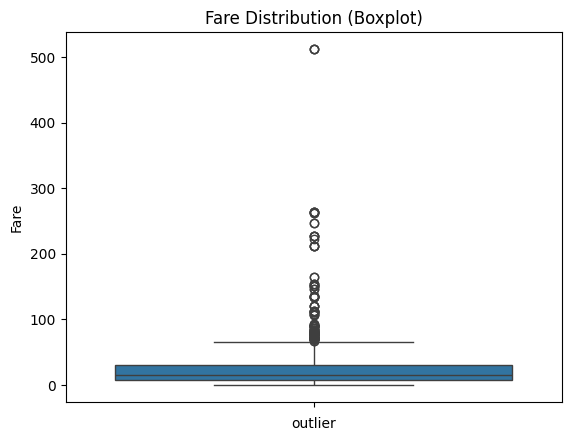

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['Fare'])
plt.xlabel('outlier')
plt.title('Fare Distribution (Boxplot)')
plt.show()

How survival varies by gender (Aggregation , visualization)

In [15]:
print(df.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


We note that the survival rate for females is higher than for males

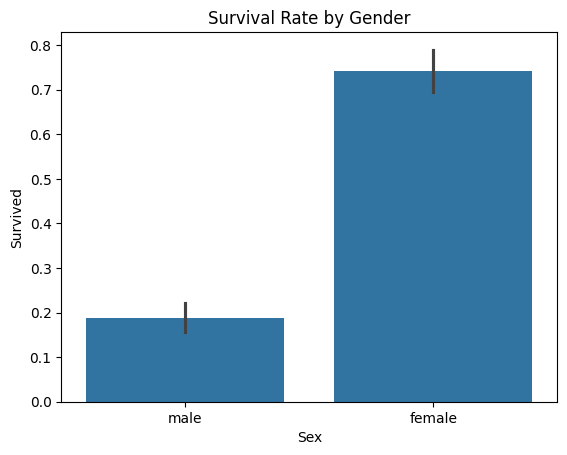

In [16]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

 How survival varies by passenger class

In [18]:
print(df.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


We note that the survival rate in first class is higher than in second and third class

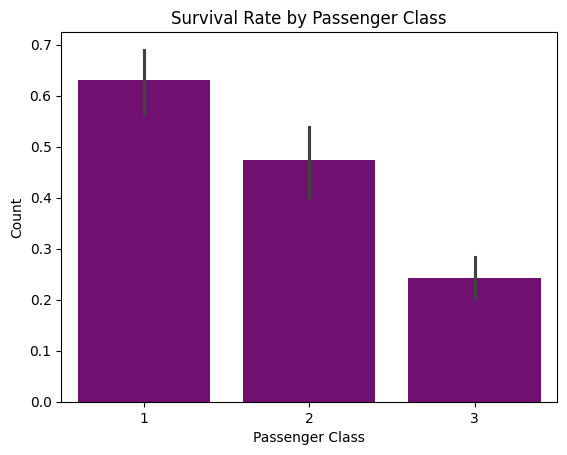

In [26]:
sns.barplot(x='Pclass', y='Survived', data=df , color= 'purple')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Rate by Passenger Class')
plt.show()

Age distribution of survivors vs non-survivors

In [22]:
print(df.groupby('Survived')['Age'].describe())

          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


This is evident from the distribution where the count of Survived (0) is higher than that of Survived (1)

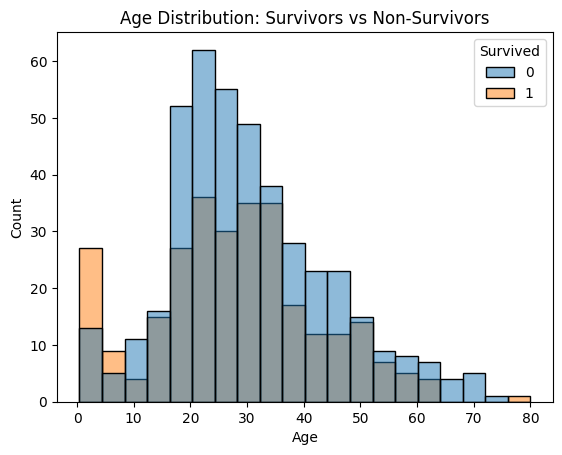

In [23]:
sns.histplot(data=df, x='Age', hue='Survived')
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.show()

In [24]:
print(df['Fare'].describe)

<bound method NDFrame.describe of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64>


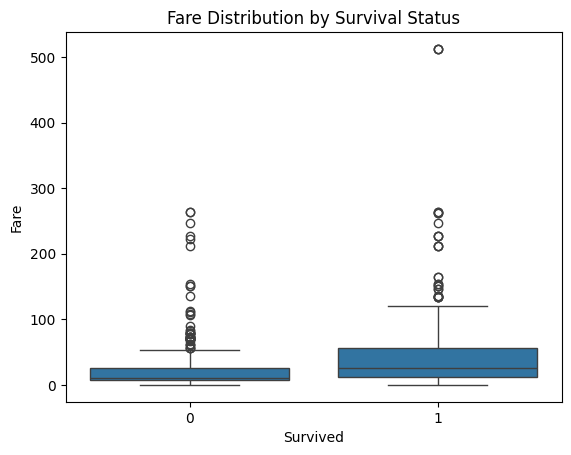

In [25]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.show()

Passengers who survived generally paid higher fares than those who did not survive, which reflects that the survival rate in first class was the highest.



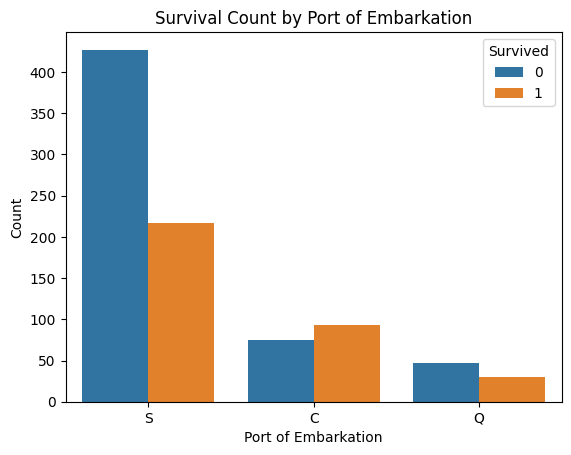

In [28]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

The Southampton port (S) had the lowest survival rate, while Cherbourg (C) had the highest.

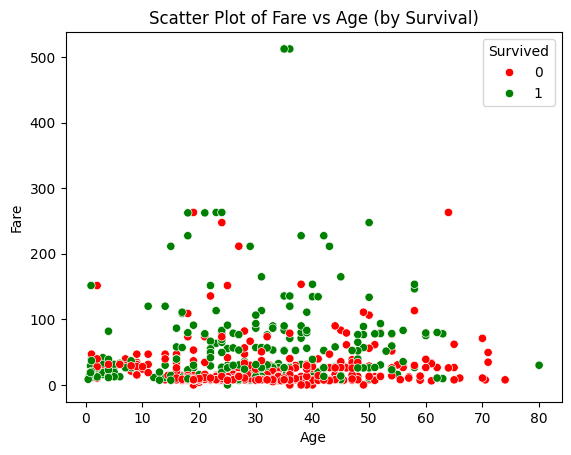

In [32]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette= {0:'red', 1: 'green'})
plt.title('Scatter Plot of Fare vs Age (by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

We observe that most ticket fares are below 100, and the majority of passengers in this range did not survive.

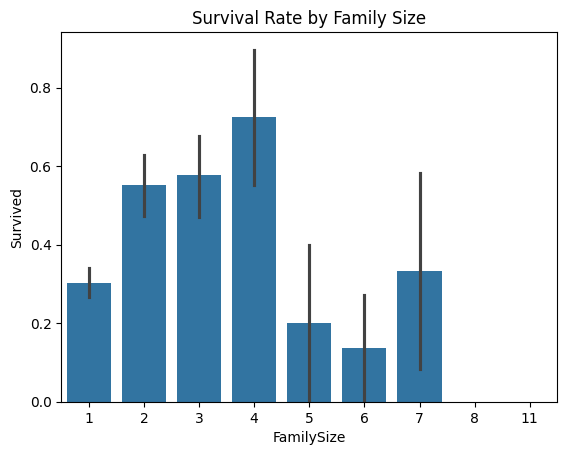

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

Passengers with small families (2–4 members) had a higher survival rate , Those traveling alone or with very large families had lower chances of survival.

_______________________________________________________________________________________________________________________________________

Summary & Insights
1. Females had a significantly higher survival rate compared to males.
2. First-class passengers were more likely to survive than second and third-class passengers.
3. Children (under 18) had a slightly better chance of survival than adults.
4. Passengers who paid higher fares survived more often, likely due to being in higher classes.
5. Cherbourg (C) had the highest survival rate, while Southampton (S) had the lowest.
6. Most non-survivors were third-class males.
7. There are many outliers in Fare that can skew analysis results.
8. The dataset contains missing values in Age, Embarked, and Cabin columns, which affect accuracy.
9. Family size impacted survival, with very large families having lower survival rates.

_________________________________________________________________________________________________________________________________________________________________________

Bouns

In [ ]:
#1.	What is the overall survival rate of passengers aboard the Titanic?
overall_survival_rate  = df['Survived'].mean()
print(f"overall survival rate {overall_survival_rate *100} %")

overall survival rate 38.38383838383838 %


In [ ]:
#2.	Did gender influence the chances of survival? If so, how?
    #yes , the percentage of females are higher than males

survival_gender = df.groupby('Sex')['Survived'].mean()
print(survival_gender)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [ ]:
#3.	How did passenger class (1st, 2nd, 3rd) affect survival rates? 
  # from visualization in EDA [Survival Rate by Passenger Class] and We note that the survival rate in first class is higher than in second and third class

survival_rates = df.groupby('Pclass')['Survived'].mean()
print(survival_rates)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [ ]:
#4.	What is the age distribution of survivors compared to non-survivors?
   # from visualization in EDA --> This is evident from the distribution where the count of Survived (from 20 to 40 years) is The highest

In [ ]:
#5.	Which embarkation port (Embarked) had the highest survival rate?
    #from visualization in EDA --> The Southampton port (S) had the lowest survival rate, while Cherbourg (C) had the highest.

In [ ]:
#6.	Was there a relationship between fare paid and survival?
    # from visualization in EDA --> yes , Because the First and second class passengers have a higher survival rate than third class

In [ ]:
#7.	Were children (passengers under 18) more likely to survive than adults? 
    # [Child] that is True if age < 18, then grouped by it to compare survival --> we note is 53% survived passengers under 18

df['Child'] = df['Age'] < 18
df.groupby('Child')['Survived'].mean()


Child
False    0.361183
True     0.539823
Name: Survived, dtype: float64

In [ ]:
#8.	How did family size (siblings/spouses and parents/children aboard) impact survival chances?
    # from visualization in EDA [Survival Rate by Family Size]

In [ ]:
#9.	How did survival vary when combining both gender and passenger class?
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64